In [1]:
from pysb.core import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.integrate import ScipyOdeSimulator as SOS
from pysb.bng import generate_equations

Model()
Monomer('NOTCH3', ['dll4', 'jag2'])
Monomer('DLL4', ['notch3'])
Monomer('JAG2', ['notch3'])
Monomer('NICD', ['rbpj'])
Monomer('RBPJ', ['nicd'])
Monomer('HES1', ['dimer'])
Monomer('DIMER', ['hes1'])
Monomer('HCM', ['e'])
Monomer('HNP', ['hes6', 'enzp'])
Monomer ('HES6', ['hnp'])
Monomer ('ENZM', ['m'])
Monomer ('ENZP', ['hnp'])

Parameter('kf', 1e-2)
Parameter('kr', 1e-4)
Parameter('kc', 1)
Parameter('NOTCH3_0', 10)
Parameter('JAG2_0', 15)
Parameter('DLL4_0', 20)
Parameter('NICD_0', 0)
Parameter('RBPJ_0', 10)
Parameter('DIMER_0', 0)
Parameter('HES1_0', 1)
Parameter('HCM_0', 0)
Parameter('HNP_0', 0)
Parameter('HES6_0', 20)
Parameter('ENZM_0', 10)
Parameter('ENZP_0', 10)

Initial(NOTCH3(dll4 = None, jag2 = None), NOTCH3_0)
Initial(JAG2(notch3 = None), JAG2_0)
Initial(DLL4(notch3 = None),DLL4_0)
Initial(NICD(rbpj = None),NICD_0)
Initial(RBPJ(nicd = None),RBPJ_0)
Initial(HES1(dimer = None),HES1_0)
Initial(DIMER(hes1 = None),DIMER_0)
Initial(HCM(e = None),HCM_0)
Initial(HNP(hes6 = None, enzp = None),HNP_0)
Initial(HES6(hnp = None),HES6_0)
Initial(ENZM(m = None),ENZM_0) 
Initial(ENZP(hnp = None),ENZP_0) 

Initial(ENZP(hnp=None), ENZP_0)

In [2]:
Rule('jag_binds_notch', JAG2(notch3 = None) + NOTCH3(dll4 = None, jag2 = None) |
     JAG2(notch3 = 1) % NOTCH3(dll4 = None, jag2 = 1), kf, kr)
Rule('dll_binds_notch', DLL4(notch3 = None) + NOTCH3(dll4 = None, jag2 = None) |
     DLL4(notch3 = 1) % NOTCH3(dll4 = 1, jag2 = None), kf, kr)

Rule('nicd_catalysis_j', JAG2(notch3 = 1) % NOTCH3(dll4 = None, jag2 = 1) >> NOTCH3(dll4 = None, jag2 = None) + JAG2(notch3 = None) + NICD(rbpj = None), kc)
Rule('nicd_catalysis_d', DLL4(notch3 = 1) % NOTCH3(dll4 = 1, jag2 = None) >> NOTCH3(dll4 = None, jag2 = None) + DLL4(notch3 = None) + NICD(rbpj = None), kc)

        
Rule('nicd_binds_rbpj', NICD(rbpj = None) + RBPJ(nicd = None) >> DIMER(hes1 = None) + NICD(rbpj = None) + RBPJ(nicd = None), kc)
Rule('hes1_activation', HES1(dimer = None) + DIMER(hes1 = None) |
     HES1(dimer = 1) % DIMER(hes1 = 1), kf, kr)


Rule('hcm_synth', HES1(dimer = None) >> HCM(e = None) + HES1(dimer = None), kf)
Rule('hnp_synth', HCM(e = None) >> HCM(e = None) + HNP(hes6 = None, enzp = None), kf)

Rule('hcm_deg_complex', HCM(e = None) + ENZM(m = None) |
     HCM(e = 1) % ENZM(m = 1), kf, kr)
Rule('hcm_deg', HCM(e = 1) % ENZM (m = 1) >> ENZM(m = None), kf)

Rule('hnp_deg_complex', HNP(hes6 = None, enzp = None) + ENZP(hnp = None) |
     HNP(hes6 = None, enzp = 1) % ENZP(hnp = 1), kf, kr)
Rule('hnp_deg', HNP(hes6 = None, enzp = 1) % ENZP (hnp = 1) >> ENZP(hnp = None), kf)

Rule('hes6_hes1_complex', HNP(hes6 = None, enzp = None) + HES6(hnp = None) |
     HNP(hes6 = 1, enzp = None) % HES6(hnp = 1), kf, kr)
Rule('hes6_hes1_deg', HNP(hes6 = 1, enzp = None) % HES6 (hnp = 1) >> HES6(hnp = None), kf)

Observable('JAG_b_Notch_obs',  JAG2(notch3 = 1) % NOTCH3(dll4 = None, jag2 = 1))
Observable('DLL_b_Notch_obs', DLL4(notch3 = 1) % NOTCH3(dll4 = 1, jag2 = None))
Observable('Unbound_Notch_obs', NOTCH3(dll4 = None, jag2 = None))

generate_equations(model, verbose = False)

print
for sp in model.species:
    print(sp)

NOTCH3(dll4=None, jag2=None)
JAG2(notch3=None)
DLL4(notch3=None)
NICD(rbpj=None)
RBPJ(nicd=None)
HES1(dimer=None)
DIMER(hes1=None)
HCM(e=None)
HNP(hes6=None, enzp=None)
HES6(hnp=None)
ENZM(m=None)
ENZP(hnp=None)
JAG2(notch3=1) % NOTCH3(dll4=None, jag2=1)
DLL4(notch3=1) % NOTCH3(dll4=1, jag2=None)
DIMER(hes1=1) % HES1(dimer=1)
ENZM(m=1) % HCM(e=1)
ENZP(hnp=1) % HNP(hes6=None, enzp=1)
HES6(hnp=1) % HNP(hes6=1, enzp=None)


2021-11-17 15:35:15.907 - pysb.simulator.scipyode - WARNING - [_interactive_] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing the 'cython' package for compiling the ODEs to C code. This warning can be suppressed by specifying compiler='python'.


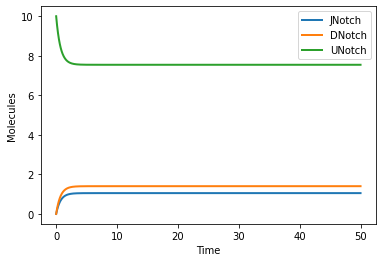

In [3]:
tspan = np.linspace(0, 50, 1001)
sim1 = SOS(model, tspan, verbose=False)
sim_result = sim1.run()
plt.plot(tspan, sim_result.observables['JAG_b_Notch_obs'], lw=2, label='JNotch')
plt.plot(tspan, sim_result.observables['DLL_b_Notch_obs'], lw=2, label='DNotch')
plt.plot(tspan, sim_result.observables['Unbound_Notch_obs'], lw=2, label='UNotch')
plt.xlabel("Time")
plt.ylabel("Molecules")
plt.legend(loc=0)
plt.show()